Total rows and columns

 (284807, 31) 

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
5       -0.425966   0.960523  1.141109 -0.168252  0.420987 -0.029728   
6        1.229658   0.141004  0.045371  1.202613  0.191881  0.272708   
7       -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118   
8       -0.894286   0.286157 -0.113192 -0.271526  2.669599  3.721818   
9       -0.338262   1.119593  1.044367 -0.222187  0.499361 -0.246761   
10       1.449044  -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11       0.384978   0.616109 -0.874300 -0.094019  2.924584  3.317027   
12       1.249999  -1.22

Total rows and columns

 (1, 30) 

         V1        V2        V3        V4        V5        V6        V7  \
0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9       V10   ...         V20       V21       V22  \
0  0.069539 -0.736727 -0.366846   ...    0.203711 -0.246914 -0.633753   

        V23      V24       V25       V26       V27       V28  Amount  
0 -0.120794 -0.38505 -0.069733  0.094199  0.246219  0.083076    3.68  

[1 rows x 29 columns]
CONFUSION-MATRIX---->
[[56861     3]
 [   20    78]]
CLASSIFICATION-MATRIX---->
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.80      0.87        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.98      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy score: 0.9995962220427653


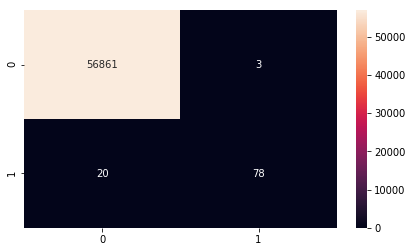

        Actual  Predicted
43428        1          1
49906        0          0
29474        0          0
276481       0          0
278846       0          0
101565       0          0
260880       0          0
214337       0          0
201575       0          0
81055        0          0
134976       0          0
237701       0          0
256836       0          0
97650        0          0
158290       0          0
246697       0          0
68279        0          0
267585       0          0
26525        0          0
74422        0          0
206357       0          0
257395       0          0
283656       0          0
231156       0          0
38442        0          0
Roc Curve evaluation


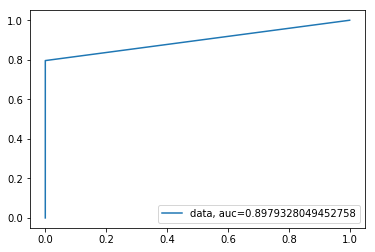

In [4]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
#from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
#from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

#read the data set
data = pd.read_csv('creditcard.csv')

#no of rows and columns
print('Total rows and columns\n\n',data.shape,'\n')

#Dependent and independent variable
X = data.iloc[:, 1:30].columns

y = data['Class']

X = data[X]
print(X)
#total count in each class
'''count = data['Class'].value_counts()
print('Total count in each class\n\n',count)'''
print('\n')

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build the model
'''clf = LogisticRegression()'''
clf = RandomForestClassifier(n_jobs=2, random_state=0)
'''clf = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=50)'''
'''clf=XGBClassifier()'''


# Train the classifier
clf.fit(X_train, y_train)
cc1=pd.read_csv('ccc2.csv')
print('Total rows and columns\n\n',cc1.shape,'\n')
#test the model
cc=cc1.iloc[:,1:30].columns
ccdata=cc1[cc]
print(ccdata)

#the below code to be used for single line prediction
'''y_pred = clf.predict(ccdata)
print(y_pred)'''

y_pred=clf.predict(X_test)
#classification report
#print(y_pred)
cr = (classification_report(y_test, y_pred))

#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("CONFUSION-MATRIX---->")
print(cm)

#classification report
print("CLASSIFICATION-MATRIX---->")
print(cr)

#Accuracy score
a= (metrics.accuracy_score(y_test, y_pred))
print('Accuracy score:',a)
#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(25))

#ROC curve evaluation
print('Roc Curve evaluation')
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label='data, auc='+str(auc))
plt.legend(loc=4)
plt.show()



In [7]:
from sklearn.externals import joblib


In [12]:
joblib.dump(clf,'random-forest.pkl')
joblib.dump(cr,'rf-classification-report.pkl')
joblib.dump(a,'rf-accuracy.pkl')

['rf-accuracy.pkl']